In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Transfer learning project/')
# os.chdir('/content/drive/My Drive/')

In [4]:
from glob import glob

for item in glob("*"):
  print(item)

UCR_TS_Archive_2015
TSC visualization.ipynb
PAD implemnetation.ipynb
PAD_distance_matrix.csv
PAD_heatmap.jpg
PAD_all.ipynb
DBA (with DTW).ipynb
PAD_20.ipynb
TLCC.ipynb
Model_results_598 - Sheet1 (1).csv
Model_results_598 - Sheet1.csv
Main shared file - cs 598.ipynb


In [5]:
data = pd.read_csv("Model_results_598 - Sheet1.csv")
data

,Source,Target,Case_3,Case_2,Case_1,DBA_DTW,PAD,Pearson,TLCC,TLCC_time_lag
0,Wine,DiatomSizeReduction,0.909871,0.919173,0.242471,15.862692,5.914,0.513803,0.457,25
1,ShapesAll,DiatomSizeReduction,1.295315,0.919173,0.242471,0.377843,7.760,0.929555,0.840,0
2,Adiac,DiatomSizeReduction,0.805018,0.919173,0.242471,0.404591,1.584,0.196188,0.930,0
3,Strawberry,Meat,0.654977,0.628231,0.186721,2.176487,1.380,0.330262,0.580,18
4,50words,Meat,0.674566,0.628231,0.186721,3.175164,7.742,0.270817,0.775,0
5,Beef,Meat,0.648409,0.628231,0.186721,3.738592,6.823,0.931884,0.810,0
6,MALLAT,OliveOil,0.967169,0.873905,0.484973,7.663162,9.317,0.472645,0.510,0
7,ScreenType,OliveOil,1.066569,0.873905,0.484973,12.983800,113.637,0.054390,0.535,10
8,FaceFour,OliveOil,0.941654,0.873905,0.484973,12.983800,38.811,0.000320,0.410,5
9,UWaveGestureLibraryAll,Wine,0.564939,0.534490,1.395691,9.278547,25.823,0.202956,0.530,5


In [6]:
data["combo"] = ['combo_{}'.format(i) for i in range(1, 16)]
data

,Source,Target,Case_3,Case_2,Case_1,DBA_DTW,PAD,Pearson,TLCC,TLCC_time_lag,combo
0,Wine,DiatomSizeReduction,0.909871,0.919173,0.242471,15.862692,5.914,0.513803,0.457,25,combo_1
1,ShapesAll,DiatomSizeReduction,1.295315,0.919173,0.242471,0.377843,7.760,0.929555,0.840,0,combo_2
2,Adiac,DiatomSizeReduction,0.805018,0.919173,0.242471,0.404591,1.584,0.196188,0.930,0,combo_3
3,Strawberry,Meat,0.654977,0.628231,0.186721,2.176487,1.380,0.330262,0.580,18,combo_4
4,50words,Meat,0.674566,0.628231,0.186721,3.175164,7.742,0.270817,0.775,0,combo_5
5,Beef,Meat,0.648409,0.628231,0.186721,3.738592,6.823,0.931884,0.810,0,combo_6
6,MALLAT,OliveOil,0.967169,0.873905,0.484973,7.663162,9.317,0.472645,0.510,0,combo_7
7,ScreenType,OliveOil,1.066569,0.873905,0.484973,12.983800,113.637,0.054390,0.535,10,combo_8
8,FaceFour,OliveOil,0.941654,0.873905,0.484973,12.983800,38.811,0.000320,0.410,5,combo_9
9,UWaveGestureLibraryAll,Wine,0.564939,0.534490,1.395691,9.278547,25.823,0.202956,0.530,5,combo_10


Text(0, 0.5, 'Model loss - Without transfer learning')

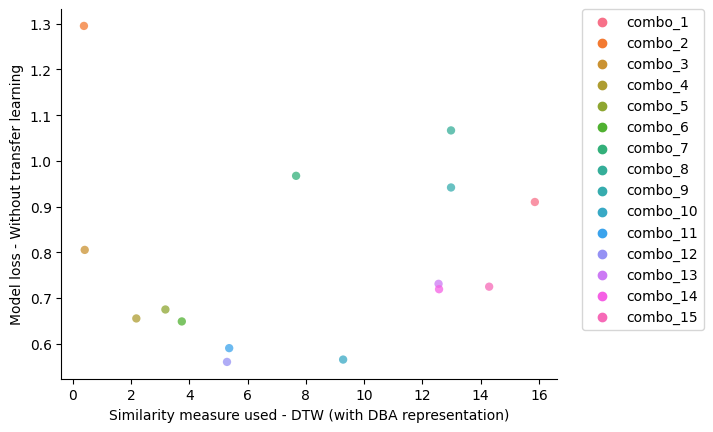

In [7]:
import seaborn as sns

# create scatter plot with hue based on categorical variable
sns.scatterplot(data=data, x=data["DBA_DTW"], y=data["Case_3"], hue=data["combo"],legend="brief", edgecolor="none", alpha=0.75)
sns.despine() # remove the top and right spines

# move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Similarity measure used - DTW (with DBA representation)")
plt.ylabel("Model loss - Without transfer learning")

Text(0, 0.5, 'Model loss - Source dataset is randomly chosen')

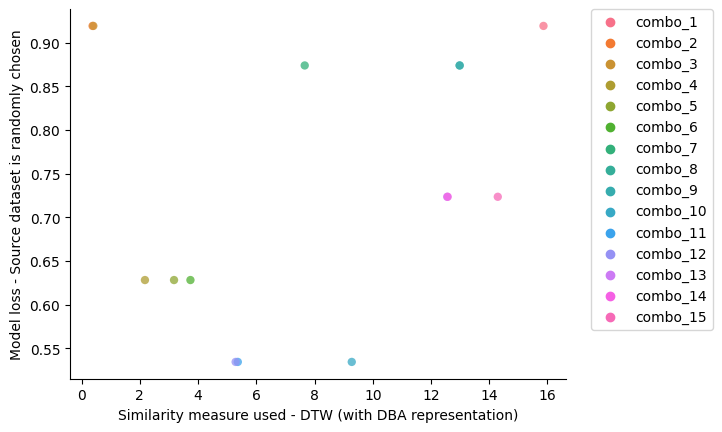

In [8]:
sns.scatterplot(data=data, x=data["DBA_DTW"], y=data["Case_2"], hue=data["combo"],legend="brief", edgecolor="none", alpha=0.75)
sns.despine() # remove the top and right spines

# move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Similarity measure used - DTW (with DBA representation)")
plt.ylabel("Model loss - Source dataset is randomly chosen")

Text(0, 0.5, 'Model loss - Source dataset is the nearest neigbour')

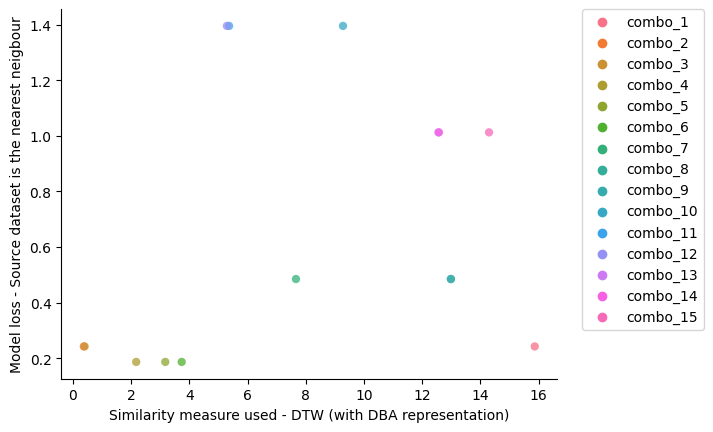

In [9]:
sns.scatterplot(data=data, x=data["DBA_DTW"], y=data["Case_1"], hue=data["combo"],legend="brief", edgecolor="none", alpha=0.75)
sns.despine() # remove the top and right spines

# move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Similarity measure used - DTW (with DBA representation)")
plt.ylabel("Model loss - Source dataset is the nearest neigbour")

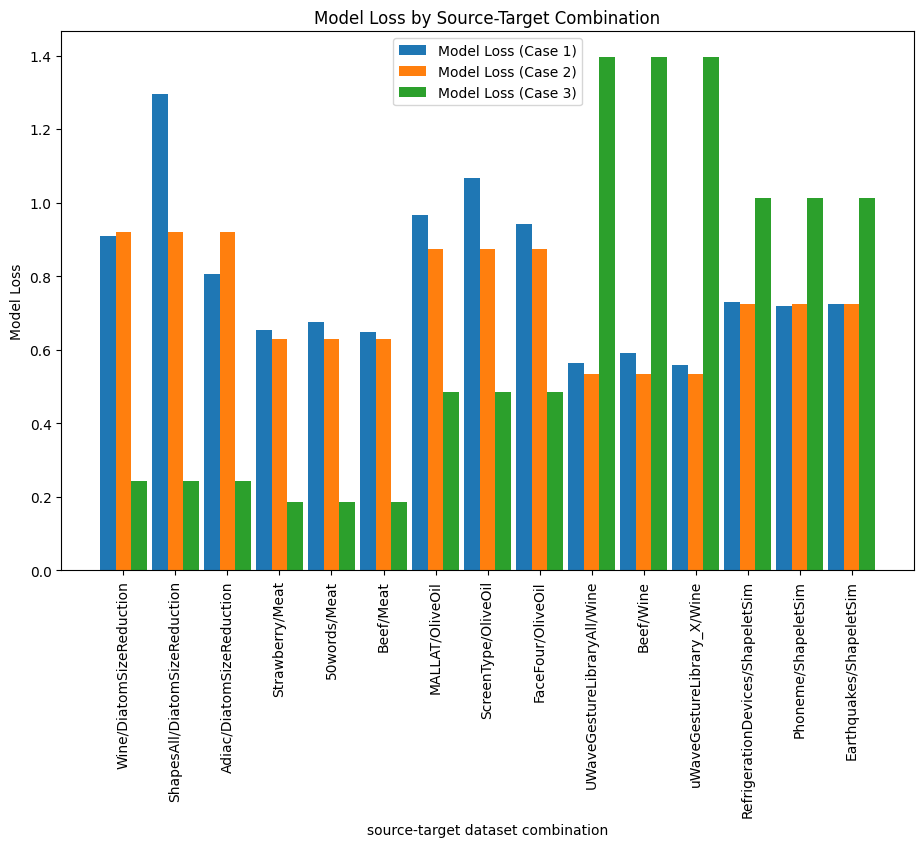

In [12]:
import numpy as np

# Define the labels
data = np.array([
    [0.9098713994, 0.919172585, 0.2424708307],
    [1.295314789, 0.919172585, 0.2424708307],
    [0.8050181866, 0.919172585, 0.2424708307],
    [0.6549767852, 0.6282308102, 0.1867206544],
    [0.6745662689, 0.6282308102, 0.1867206544],
    [0.6484087706, 0.6282308102, 0.1867206544],
    [0.967169404, 0.8739048839, 0.484972775],
    [1.066568971, 0.8739048839, 0.484972775],
    [0.9416535497, 0.8739048839, 0.484972775],
    [0.5649388433, 0.5344898701, 1.395691037],
    [0.5899701118, 0.5344898701, 1.395691037],
    [0.5597843528, 0.5344898701, 1.395691037],
    [0.7307565212, 0.7235580683, 1.012698293],
    [0.7189543843, 0.7235580683, 1.012698293],
    [0.7244969606, 0.7235580683, 1.012698293]
])


labels = [
    'Wine/DiatomSizeReduction',
    'ShapesAll/DiatomSizeReduction',
    'Adiac/DiatomSizeReduction',
    'Strawberry/Meat',
    '50words/Meat',
    'Beef/Meat',
    'MALLAT/OliveOil',
    'ScreenType/OliveOil',
    'FaceFour/OliveOil',
    'UWaveGestureLibraryAll/Wine',
    'Beef/Wine',
    'uWaveGestureLibrary_X/Wine',
    'RefrigerationDevices/ShapeletSim',
    'Phoneme/ShapeletSim',
    'Earthquakes/ShapeletSim'
]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(11, 7))

# Create the bar chart
x = np.arange(len(labels))
width = 0.3
rects1 = ax.bar(x - width, data[:, 0], width, label='Model Loss (Case 1)')
rects2 = ax.bar(x, data[:, 1], width, label='Model Loss (Case 2)')
rects3 = ax.bar(x + width, data[:, 2], width, label='Model Loss (Case 3)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Loss')
ax.set_xlabel("source-target dataset combination")
ax.set_title('Model Loss by Source-Target Combination')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()
